# Neural Network to classify handwritten digits from mnist dataset

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.activations import relu, sigmoid, linear
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
# Define the model
nn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=relu),
    Dense(10, activation=sigmoid)
])

In [5]:
# Compile the model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Train the model 
history = nn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0043 - accuracy: 0.9986
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0038 - accuracy: 0.9987
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.004

In [43]:
# Using the trained model to predict digits in x_test
nn_predictions = nn_model.predict(x_test)

313/313 [==============================] - 0s 964us/step


In [44]:
history.history['accuracy'][-1]*100

99.84166622161865

## Plotting the data 

In [45]:
x_train.shape

(60000, 28, 28)

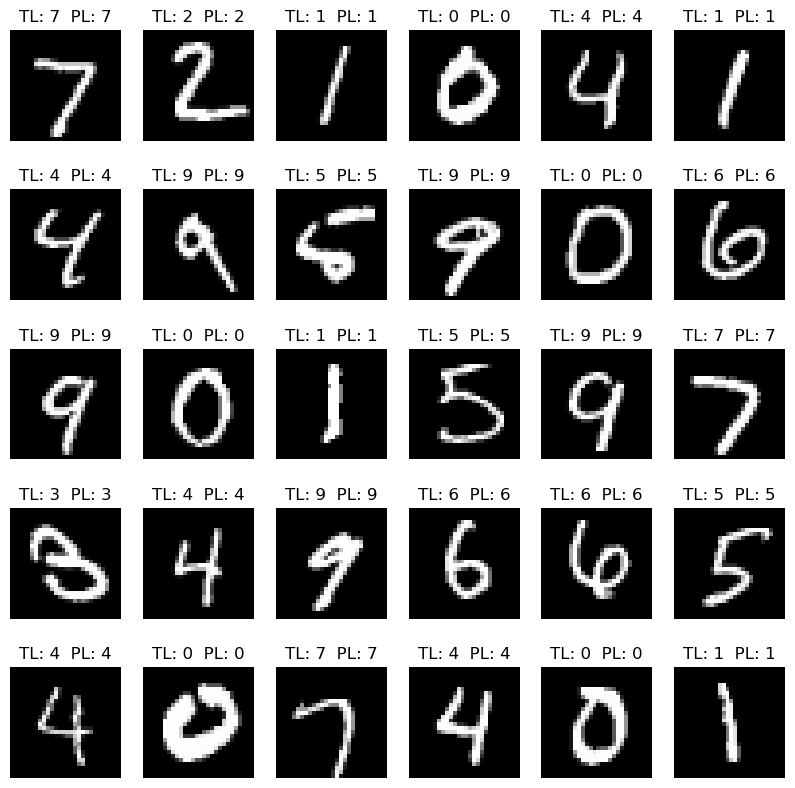

In [46]:
# Predictions made on first 30 samples in x_test

plt.figure(figsize=(10, 10))

samples = 30
for i in range(samples) :
    plt.subplot(5, samples//5, i+1)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"TL: {true_label}  PL: {predicted_label}")
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

# Using a Convolutional Neural Network

In [32]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation=relu, input_shape=(28,28,1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(units=128, activation=relu),
    Dense(units=10, activation=sigmoid)
])

In [33]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [35]:
cnn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0230 - accuracy: 0.9928
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 4/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0120 - accuracy: 0.9964
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0043 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 50s 27m

313/313 [==============================] - 1s 3ms/step


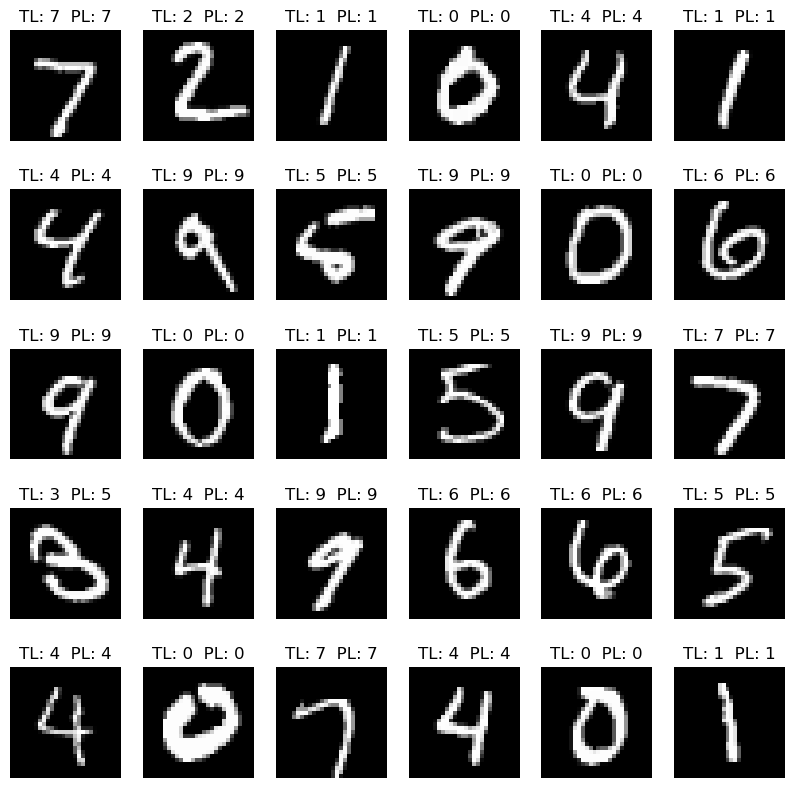

In [39]:
# Predictions made on first 30 samples in x_test by the CNN

cnn_predictions = cnn_model.predict(x_test)

plt.figure(figsize=(10, 10))

samples = 30
for i in range(samples) :
    plt.subplot(5, samples//5, i+1)
    predicted_label = np.argmax(cnn_predictions[i])
    true_label = y_test[i]
    plt.title(f"TL: {true_label}  PL: {predicted_label}")
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

In [42]:
def display_errors(predictions, num_samples, y_test) : 
# Tracking Errors made by CNN in the first 1000 samples
    samples = num_samples
    error_count = 0
    predicted_labels=[]
    true_labels=[]
    error_indices = []

    for i in range(samples) :
        predicted_label = np.argmax(predictions[i])
        true_label = y_test[i]
        if predicted_label != true_label :
            error_count+=1
            predicted_labels.append(predicted_label)
            true_labels.append(true_label)
            error_indices.append(i)

    # Plotting errors

    plt.figure(figsize=(10, 50))

    for i in range(error_count) :
        plt.subplot((error_count//5)*5, 5, i+1)
        plt.title(f"TL: {true_labels[i]}  PL: {predicted_labels[i]}")
        plt.imshow(x_test[error_indices[i]], cmap='gray')

        plt.axis('off')

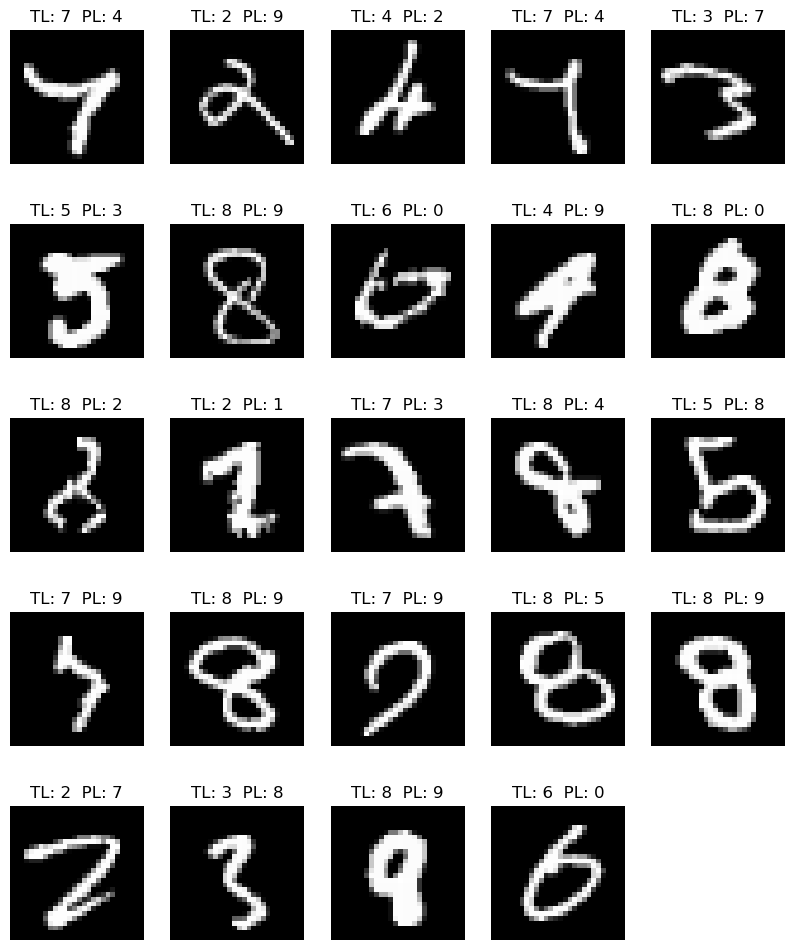

In [47]:
# Errors made by the Neural Network (Fully Connected)
display_errors(nn_predictions, 1000, y_test)

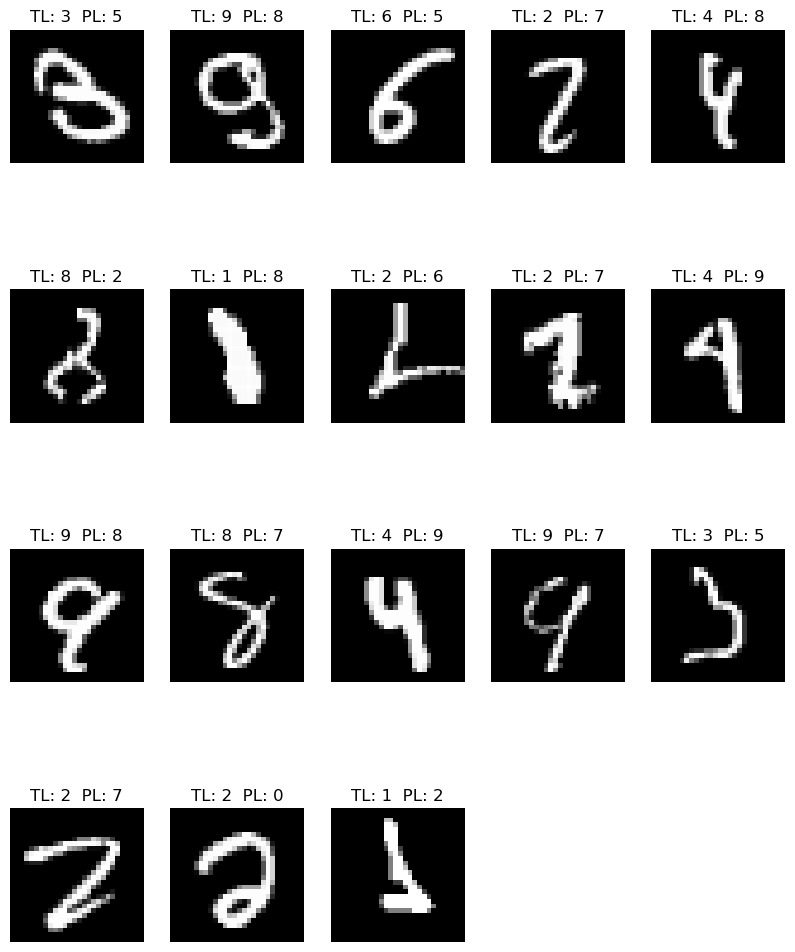

In [49]:
# Errors made by the Convolutional Neural Network
display_errors(cnn_predictions, 1000, y_test)